# Decision Trees for Classification Problems

Decision tree is one of the most popular supervised learning algorithms. It uses a tree like model to classify data based on various attributes. The decision tree structure includes root node, branches and leaf nodes. Each node is a test on a feature and branch denotes the outcome of the test.

This is a problem to predict safety of cars based on various attributes.

In [2]:
#Various libraries useful for this code is called

import numpy as np # used for performing mathematical operations on arrays
import pandas as pd # used for data processing 
import matplotlib.pyplot as plt # used for data visualization
import seaborn as sns # used for statistical data visualization
%matplotlib inline

In [3]:
#The csv file containing data is loaded into a dataframe
df = pd.read_csv('car_evaluation.csv')

In [25]:
#Exploratory Data Analysis
print("The dataset has ",df.shape[0]," rows and ",df.shape[1]," columns")

print("First 5 rows of the dataset")
display(df.head())

print("Info about the dataset")
df.info()

print("Frequency of different variables")
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = column_names
for column in column_names:
    print(df[column].value_counts())

# check missing values in variables
print("Missing  values in each column")
df.isnull().sum()

The dataset has  1727  rows and  7  columns
First 5 rows of the dataset


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Info about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
Frequency of different variables
high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       3

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [26]:
#X is the feature vector and y is the target variable
X = df.drop(['class'], axis=1)
y = df['class']

In [30]:
#Splitting feature vector and target variable into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#Check the number of rows and columns in train and test datasets
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [33]:
#Feature Engineering

#Datatypes of variables in training dataset
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [34]:
#First 5 rows of training dataset
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [37]:
#Import category encoders - used for encoding categorical variables into numerical values
import category_encoders as ce

#Encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

#First 5 rows of X train after encoding
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [38]:
#First 5 rows of X test after encoding
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [67]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Instantiate the DecisionTreeClassifier model with criterion gini index
classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

# fit the model
classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [69]:
#Predict the results with X test dataset
y_prediction = clf_gini.predict(X_test)

In [70]:
#To calculate accuracy of prediction
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_prediction)))

Model accuracy score with criterion gini index: 0.8491


[Text(0.25, 0.9, 'X[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.375, 0.7, 'X[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.5, 0.5, 'X[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.25, 0.3, 'X[1] <= 2.5\ngini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.125, 0.1, 'gini = 0.273\nsamples = 129\nvalue = [21, 0, 108, 0]'),
 Text(0.375, 0.1, 'gini = 0.373\nsamples = 137\nvalue = [103, 0, 34, 0]'),
 Text(0.75, 0.3, 'X[1] <= 2.5\ngini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]'),
 Text(0.625, 0.1, 'gini = 0.428\nsamples = 125\nvalue = [90, 0, 28, 7]'),
 Text(0.875, 0.1, 'gini = 0.688\nsamples = 133\nvalue = [43, 51, 7, 32]')]

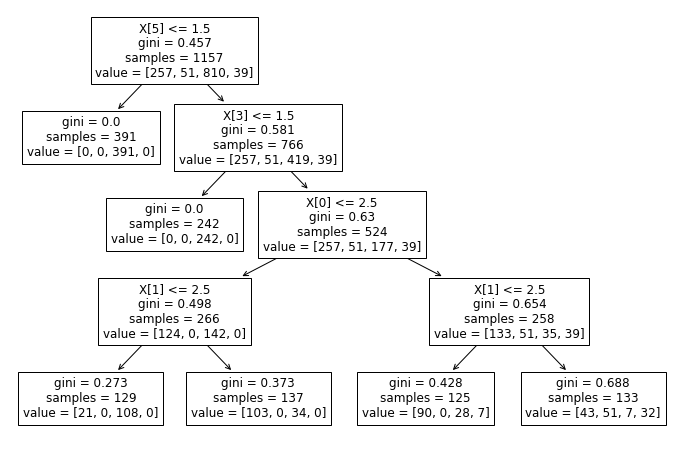

In [71]:
#To plot the decision tree
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(classifier_gini.fit(X_train, y_train))